SHIVAM MISHRA >> ENPM 808W >> Assignment 1 >> Question 1

The nyt data-set contains 31 csv files, each one represents one day’s worth of ad impressions and clicks on the New York Times homepage in May, 2012. Each row represents a single user.
Here, the first day data is initially being explored.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'D:/UMD/ENPM 808W/folder_1/nyt1.csv'
df = pd.read_csv(file_path)
df.head() # shows the first five rows of the data-frame

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 17.5 MB


There are 5 columns: age, gender (0=female, 1=male), number of impressions (page views), number clicks (actions) and whether the user was logged.in.
df.info() reveals that the data-set contains the data for 458,441 users. All the data types are int64. Since the data-set is simulated, it needs to be thoroughly explored and cleaned before moving forward to analysis.

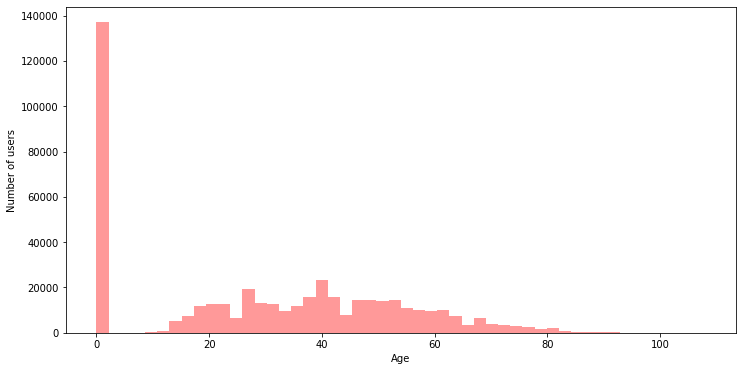

In [4]:
import seaborn as sns
plt.figure(figsize=(12,6))
figure = sns.distplot(df['Age'], color='r', kde=False )
plt.xlabel("Age")
plt.ylabel("Number of users")
plt.show()

In [5]:
df[(df['Age']) == 0].count()

Age            137106
Gender         137106
Impressions    137106
Clicks         137106
Signed_In      137106
dtype: int64

Plot between users count and Age shows that 137,106 users have their age = 0. This is not possible in the real scenario. Dropping the rows with values = 0.

In [6]:
df = df[df['Age'] > 0]
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321335 entries, 0 to 458438
Data columns (total 5 columns):
Age            321335 non-null int64
Gender         321335 non-null int64
Impressions    321335 non-null int64
Clicks         321335 non-null int64
Signed_In      321335 non-null int64
dtypes: int64(5)
memory usage: 14.7 MB


#### Question (a)

I have created a bin function (bin_fun) that bins the age of the people in the data. The distribution for the same is shown below. Note, -18 denotes the age values lower than 18.

In [7]:
def bin_fun(x):
    x = int(x)
    if x < 18:
        return '-18'
    elif x <= 24:
        return '18-24'
    elif x<=34:
        return '25-34'
    elif x<=44:
        return '35-44'
    elif x<=54:
        return '45-54'
    elif x<=64:
        return '55-64'
    else:
        return '65+'

In [8]:
df['Age_Group'] = df['Age'].apply(lambda x: bin_fun(x))

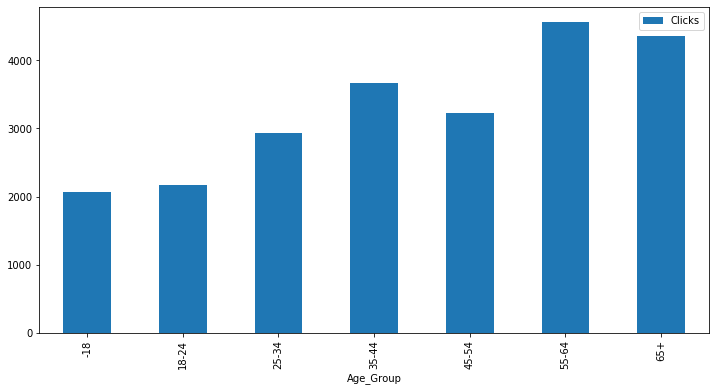

In [9]:
df.groupby('Age_Group').agg({'Clicks':'sum'}).plot.bar(figsize=(12,6))

Below graph shows how impressions count vary.

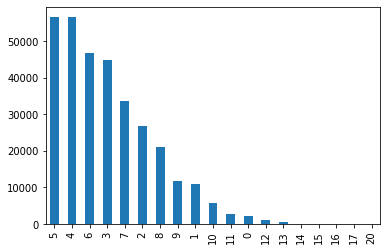

In [10]:
df['Impressions'].value_counts().plot('bar')

#### Question b) (i)

Distributions of number impressions and click-through-rate with each age-group.

In [11]:
df.groupby('Age_Group').agg({'Clicks':'sum'})

,Clicks
Age_Group,
-18,2065
18-24,2167
25-34,2937
35-44,3662
45-54,3232
55-64,4556
65+,4350


#### Impressions count with each age group.

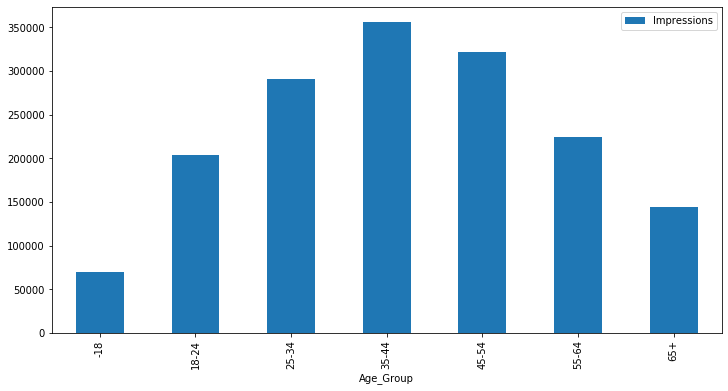

In [12]:
df.groupby('Age_Group').agg({'Impressions':'sum'}).plot.bar(figsize=(12,6))

The plot between impression count vs age_group on day 1 follows a perfect binomial distribution curve, with impressions count peaking in the middle. The people from 35-44 age group accounts for the most number of impressions on day1. 

In [13]:
df1 = df.groupby('Age_Group', as_index=False).agg({'Clicks':'sum'})
df1

,Age_Group,Clicks
0,-18,2065
1,18-24,2167
2,25-34,2937
3,35-44,3662
4,45-54,3232
5,55-64,4556
6,65+,4350


In [14]:
df2 = df.groupby('Age_Group', as_index = False).agg({'Impressions':'sum'})
df2

,Age_Group,Impressions
0,-18,69239
1,18-24,203585
2,25-34,290511
3,35-44,355824
4,45-54,322109
5,55-64,224688
6,65+,144120


#### Click - through rate for age group.

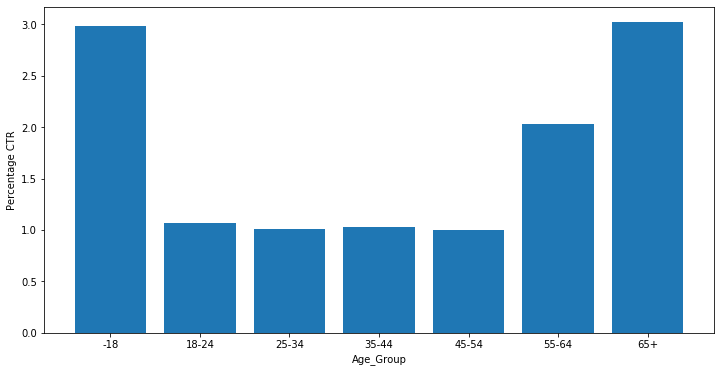

In [15]:
x = df1['Age_Group'].values
y = (df1['Clicks']*100/df2['Impressions']).values
plt.figure(figsize=(12,6))
plt.bar(x,y)
plt.xlabel('Age_Group')
plt.ylabel('Percentage CTR')
plt.show()

The CTR distribution for age_group of less than 18 years and age_group of 65+ is almost equal. This suggests that people NYT page is most viewed by the youngest and the oldest age group. This makes sense as these are the two groups who have plenty of time for reading, other age group is too busy for bread and butter, i guess. 

#### Question b) (iii)

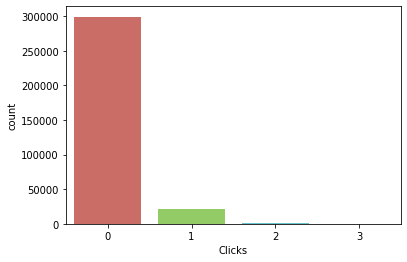

In [16]:
sns.countplot(x='Clicks',data=df, palette='hls')
plt.show()

In [17]:
df['Clicks'].value_counts()*100/len(df)

0    93.134268
1     6.591563
2     0.266077
3     0.008091
Name: Clicks, dtype: float64

Almost 93 percent of the people have click value = 0. The data is segregated into two categories, a person who didn't clicked is given a False value while the others who clicked are given clicked value equal to boolean True. The one with clicked label = False didn't clicked at all. This is done below.

In [18]:
def cat_click(x):
    if x == 0:
        return False
    else:
        return True
df['Clicked'] = df['Clicks'].apply(lambda x: cat_click(x))
df.head(10)

,Age,Gender,Impressions,Clicks,Signed_In,Age_Group,Clicked
0,36,0,3,0,1,35-44,False
1,73,1,3,0,1,65+,False
2,30,0,3,0,1,25-34,False
3,49,1,3,0,1,45-54,False
4,47,1,11,0,1,45-54,False
5,47,0,11,1,1,45-54,True
7,46,0,5,0,1,45-54,False
8,16,0,3,0,1,-18,False
9,52,0,4,0,1,45-54,False
11,21,0,3,0,1,18-24,False


#### Question b) (iii)

Text(0, 0.5, 'Percentage CTR')

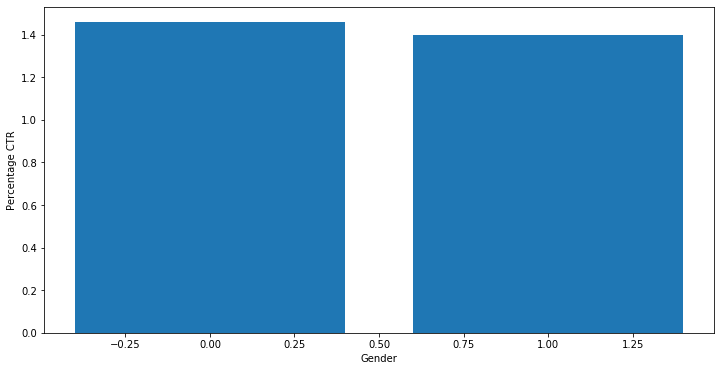

In [19]:
df2 = df.groupby('Gender', as_index = False).agg({'Impressions':'sum'})
df3 = df.groupby('Gender', as_index=False).agg({'Clicks':'sum'})

x = df2['Gender'].values
y = (df3['Clicks']*100/df2['Impressions']).values
plt.figure(figsize=(12,6))
plt.bar(x,y)
plt.xlabel('Gender')
plt.ylabel('Percentage CTR')

CTR for both the male and female readers is equal.

In [20]:
#### Average impressions per age group.

df2 = df.groupby('Age_Group', as_index = False).agg({'Impressions':'sum'})
y1 = df2['Impressions'].values
x  = df2['Age_Group'].values

In [21]:
df['Age_Group'].value_counts()

35-44    70860
45-54    64288
25-34    58174
55-64    44738
18-24    40694
65+      28753
-18      13828
Name: Age_Group, dtype: int64

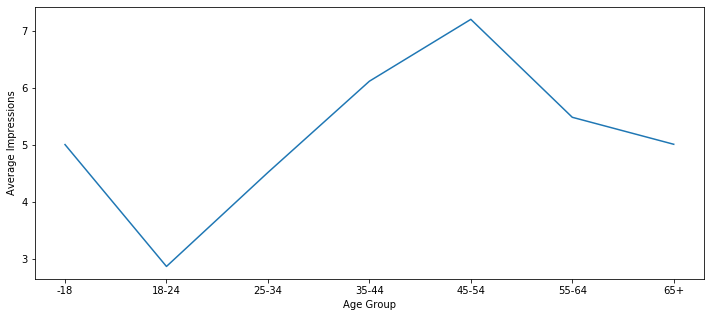

In [22]:
import numpy as np
y2 = np.asanyarray([13828, 70860, 64288, 58174, 44738, 40964, 28753])

y = y1/y2
plt.figure(figsize = (12, 5))
plt.plot(x, y)
plt.xlabel("Age Group")
plt.ylabel("Average Impressions")
plt.show()

Average impression which is equal to number of impression divided by number of people is lowest for 18-24 age group, which maybe because of the fact that most of people in this age group are just at the staring of their career...and dont pay much time to reading news. The average impression peaks at the 45-54 age group.

In [23]:
df2 = df.groupby('Gender', as_index = False).agg({'Impressions':'sum'})
df2

,Gender,Impressions
0,0,767299
1,1,842777


In [24]:
values = df['Gender'].value_counts().tolist()
df['Gender'].value_counts() 

1    168265
0    153070
Name: Gender, dtype: int64

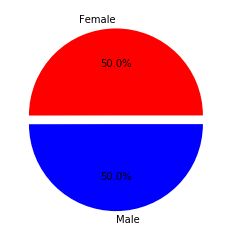

In [25]:
list_count = np.asanyarray([153070, 168265])
average_impressions = df2['Impressions'].values/list_count

fig, ax = plt.subplots(1,1)
ax.pie(average_impressions,explode=(0, 0.1), autopct='%1.1f%%', labels = ['Female','Male'], colors=['r', 'b'])
plt.show()

In [26]:
print(average_impressions)

[5.01273274 5.00862925]


Whereas the average impression for both the male and female readers are equal. 

#### Question C

The matrix I have chosen is the average impression and CTR. This can tell how the reader responds to NYT website on each day.

In [27]:
df_list = []
for i in range(1, 8):
    file_path = "D:/UMD/ENPM 808W/folder_1/nyt"+ str(i) +".csv"
    temp_df = pd.read_csv(file_path)
    temp_df = temp_df[temp_df['Age']>0]
    df_list.append(temp_df)
    



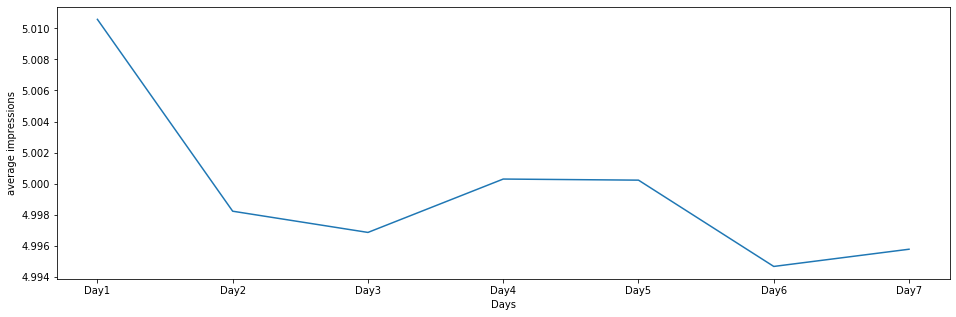

In [28]:
avg_impression_list = []
for df in df_list:
    impression = df.agg({'Impressions':'sum'})
    count = len(df)
    avg_impression = impression/count
    avg_impression_list.append(avg_impression)

y = avg_impression_list
x = ["Day" + str(i) for i in range(1,8)]

plt.figure(figsize=(16,5))
plt.xlabel('Days')
plt.ylabel('average impressions')
plt.plot(x,y)
plt.show()

The Day1 which was Tuesday starts with high average impression and significantly reduces over the course of the time. The average impression on Tuesday can be hgh because of some controversial or interesting piece of article, since on most of the days the avg impression fluctuates below 5. In this case, Day 1 seems like an outlier. 

Average impression decreases significantly at the weekend. An analysis into more of the days can give a more clear picture.

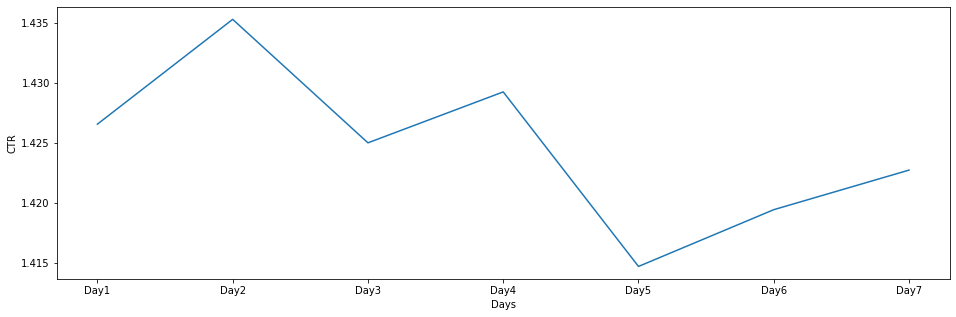

In [29]:
CTR_list = []
for df in df_list:
    CTR_list.append(int(df.agg({'Clicks':'sum'}))*100/int(df.agg({'Impressions':'sum'})))
    
x = ["Day" + str(i) for i in range(1,8)]
y = CTR_list

plt.figure(figsize=(16, 5))
plt.xlabel('Days')
plt.ylabel('CTR')
plt.plot(x,y)


Surprisingly the CTR on Day 2 is high comparison to Day1 on which average impression per user was high. The CTR values on Day5 and Day6 is considerably low, thanks to the weekend.